# Garbage Classification Dataset Exploration

### Imports

In [60]:
# DATA MANIPULATION
import pandas as pd
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# IMAGES
import skimage as ski

# SYSTEM
import os

## Dataset caracteristics

<u>GENERAL INFO</u>
- Number of total images => 2527
- Size => 48.5 Mb
- Number of images of each category => Balanced dataset?
    + 3 - Cardboard = 403 (16%)
    + 1 - Glass = 501 (20%)
    + 5 - Metal = 410 (16%)
    + 2 - Paper = 594 (24%)
    + 4 - Plastic = 482 (19%)
    + 6 - Trash = 137 (5%)


<u>COMMENTS ABOUT DATASET</u>
- Very few images of the trash cat => maybe not very important because "trash" is by default "everything that is not in other cat"? So no need to learn about it, just every non-identified image will be "trash"?
- Multiple class classification problem => will need to encode "category" into 6 columns?

##### 💻 Code

In [49]:
# Make a df with the images info
df = pd.read_csv("../raw_data/one-indexed-files.txt", sep=" ", header=None, names=["image", "category"])
df

,image,category
0,glass1.jpg,1
1,glass2.jpg,1
2,glass3.jpg,1
3,glass4.jpg,1
4,glass5.jpg,1
...,...,...
2522,trash133.jpg,6
2523,trash134.jpg,6
2524,trash135.jpg,6
2525,trash136.jpg,6


In [50]:
# Correct image name
df['image'] = df['image'].apply(lambda x: x.rstrip('.jpg'))

In [51]:
# % of each category
round(100*df['category'].value_counts(normalize = True),0)

category
2    24.0
1    20.0
4    19.0
5    16.0
3    16.0
6     5.0
Name: proportion, dtype: float64

## Exploring the images

<u>GENERAL INFO</u>
- All images have the same size => (384, 512, 3)
- Our raw dataset has 2527 observations and 384x512x3 = 589824 features + 6 categories

<u>COMMENTS ABOUT IMAGES</u>
- All images seem to be taken with a white background => this might be a condition to add to our MVA app. We can improve it afterwards by making the model learn with different backgrounds or maybe preprocess the images to make white backgrounds
- Objects are taken from different angles and also partially => model must learn from all possible inputs
- All images are color images => will the model identify correctly b&w images or objects (like a bottle) with different colors?
- We have seen Kmeans method to reduce de number of colors and PCA to reduce the number of pixels of B&W images
- Having so many features for so few observations is not great in Machine Learning; as a rule of thumb, you may want at least: $n_{features} << \sqrt{n_{observations}}$.

##### 💻 Code

In [75]:
# Load images to be able to use them with scikit-image 
images_url = '../raw_data/all_images'

list_files = os.listdir(images_url)
#len(list_files) #=> 2527
#list_files[0] #=> 'metal296.jpg'

image_list = []
for filename in list_files:
  image_list.append(ski.io.imread(os.path.join(images_url, filename)))
# len(image_list) #=> 2527
# type(image_list[0]) #=> numpy.ndarray

In [93]:
# Size of each image (all seem to have the same size (384, 512, 3))
standard_size = (384, 512, 3)

images_to_resize = []
for image in image_list:
    if image.shape!=standard_size:
        images_to_resize.append(image)
#len(images_to_resize) #=> 0

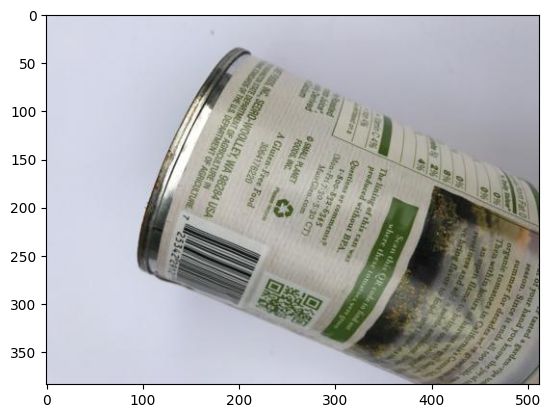

In [95]:
plt.imshow(image_list[0]);